In [1]:
# importing the necessary libraries
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 50)

# Reading the Train dataset

In [2]:
# reading the dataset
housing_df = pd.read_csv('train.csv')
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,...,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,...,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,...,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,...,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,...,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,...,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Gathering Necessary Information about the train set

In [3]:
housing_df.shape

(1460, 81)

In [4]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Data Cleaning

In [5]:
housing_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

<AxesSubplot:>

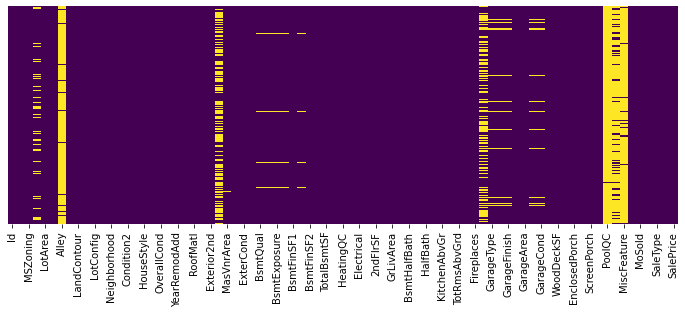

In [6]:
plt.figure(figsize = (12, 4))
sns.heatmap(housing_df.isnull(),yticklabels=False,cbar=False, cmap='viridis')


In [7]:
null_container = pd.DataFrame(housing_df.isnull().sum()/len(housing_df) * 100).reset_index()
null_container.columns = ['col_names', 'null_percent'] 
null_container['null_val_count'] = housing_df.isnull().sum().reset_index().iloc[:, 1]
null_container = null_container.sort_values( by = 'null_percent', ascending = False)
null_container.head(15)

,col_names,null_percent,null_val_count
72,PoolQC,99.520548,1453
74,MiscFeature,96.301370,1406
6,Alley,93.767123,1369
73,Fence,80.753425,1179
25,MasVnrType,59.726027,872
57,FireplaceQu,47.260274,690
3,LotFrontage,17.739726,259
59,GarageYrBlt,5.547945,81
64,GarageCond,5.547945,81
58,GarageType,5.547945,81


In [8]:
np.array([null_container[null_container['null_percent']> 6].col_names])

array([['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType',
        'FireplaceQu', 'LotFrontage']], dtype=object)

In [9]:
cols = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType','FireplaceQu', 'LotFrontage']

print("- Number of columns before:", housing_df.shape[1])

for i in range(0, null_container[null_container['null_percent']> 6].shape[0]):
    housing_df = housing_df.drop(cols[i], axis = 1)
    
print("- Number of columns now:", housing_df.shape[1])

- Number of columns before: 81
- Number of columns now: 74


<AxesSubplot:>

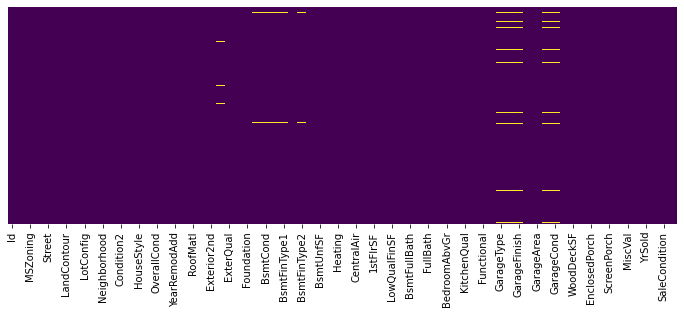

In [10]:
plt.figure(figsize = (12, 4))
sns.heatmap(housing_df.isnull(),yticklabels=False,cbar=False, cmap='viridis')


In [11]:
housing_df = housing_df.dropna()

In [12]:
housing_df.isnull().sum()[housing_df.isnull().sum() > 0]

Series([], dtype: int64)

In [14]:
housing_df.shape

(1338, 74)

In [15]:
housing_df.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,...,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,196.0,Gd,...,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,0.0,TA,...,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,162.0,Gd,...,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,0.0,TA,...,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,350.0,Gd,...,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [16]:
housing_df.duplicated().sum()

0

In [17]:
house_price_df = housing_df.copy()

***Note***: When building a machine learning model, it's crucial to consider how categorical columns are handled, especially when there are discrepancies between the categories observed in the training data and the test data. For instance, in the training data, a specific categorical column might contain four categories, but in the test data, the same column only shows three categories.

This incongruence poses a challenge during model implementation on the test data. If we create dummy variables based on all categories present in the training data and apply the model directly to the test data without considering this difference, it can lead to a mismatch. The model might not fit the test data appropriately due to the presence of categories not accounted for during training.

To address this, we need a robust strategy. One approach is to ensure that the model is trained on the most comprehensive set of categories across both training and test data. This involves preprocessing steps to handle missing or additional categories in either dataset. For instance, when creating dummy variables, it's essential to align the categories between the training and test data to prevent inconsistencies.

Ultimately, by preparing our model to accommodate the possible variation in categorical values between the training and test datasets, we can enhance its robustness and generalizability for real-world applications.

# Modifying & fixing the test data

In [18]:
test_df = pd.read_csv('test.csv')
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,...,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,...,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,...,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,...,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,...,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,...,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


<AxesSubplot:>

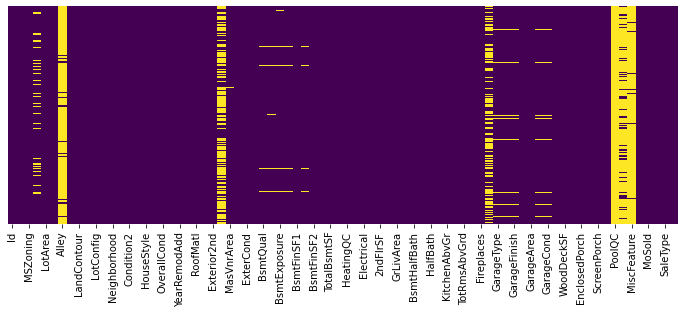

In [19]:
plt.figure(figsize = (12, 4))
sns.heatmap(test_df.isnull(),yticklabels=False,cbar=False, cmap='viridis')


In [20]:
null_container = pd.DataFrame(test_df.isnull().sum()/len(test_df) * 100).reset_index()
null_container.columns = ['col_names', 'null_percent'] 
null_container['null_val_count'] = test_df.isnull().sum().reset_index().iloc[:, 1]
null_container = null_container.sort_values( by = 'null_percent', ascending = False)
null_container.head(15)

,col_names,null_percent,null_val_count
72,PoolQC,99.794380,1456
74,MiscFeature,96.504455,1408
6,Alley,92.666210,1352
73,Fence,80.123372,1169
25,MasVnrType,61.274846,894
57,FireplaceQu,50.034270,730
3,LotFrontage,15.558602,227
59,GarageYrBlt,5.346127,78
63,GarageQual,5.346127,78
60,GarageFinish,5.346127,78


In [21]:
np.array([null_container[null_container['null_percent']> 6].col_names])

array([['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType',
        'FireplaceQu', 'LotFrontage']], dtype=object)

In [22]:
cols = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType','FireplaceQu', 'LotFrontage']

print("- Number of columns before:", test_df.shape[1])

for i in range(0, null_container[null_container['null_percent']> 6].shape[0]):
    test_df = test_df.drop(cols[i], axis = 1)
    
print("- Number of columns now:", test_df.shape[1])

- Number of columns before: 80
- Number of columns now: 73


<AxesSubplot:>

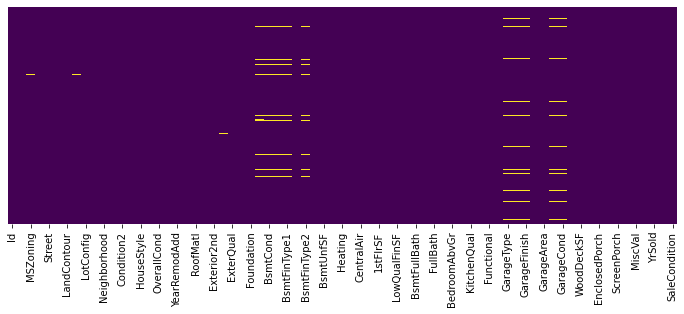

In [23]:
plt.figure(figsize = (12, 4))
sns.heatmap(test_df.isnull(),yticklabels=False,cbar=False, cmap='viridis')


In [24]:
test_df = test_df.dropna()

In [25]:
test_df.isnull().sum()[test_df.isnull().sum()>0]

Series([], dtype: int64)

In [26]:
test_df.duplicated().sum()

0

In [27]:
housing_df.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,...,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,196.0,Gd,...,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,0.0,TA,...,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,162.0,Gd,...,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,0.0,TA,...,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,350.0,Gd,...,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


### Merging the housing_df and test_df

In [28]:
final_df = pd.concat([housing_df, test_df], axis = 0)
final_df.shape

(2658, 74)

# Dummy Variable Creation

In [29]:
obj_col_train = final_df.select_dtypes(['object']).columns


In [30]:
obj_col_train

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [31]:
for i in obj_col_train:
    dummy_container = pd.get_dummies(final_df[i], drop_first = True, dtype = int, prefix = i+"_")
    final_df = pd.concat([final_df, dummy_container], axis = 1, )
    final_df = final_df.drop([i], axis = 1)
    

In [32]:
final_df.shape

(2658, 226)

In [33]:
final_df.duplicated()[final_df.duplicated() == True]

Series([], dtype: bool)

In [34]:
final_df.SalePrice

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1451         NaN
1452         NaN
1455         NaN
1456         NaN
1458         NaN
Name: SalePrice, Length: 2658, dtype: float64

In [35]:
df_train=final_df.iloc[:1422,:]
df_test=final_df.iloc[1422:,:]

In [36]:
df_test.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,...,GarageFinish__RFn,GarageFinish__Unf,GarageQual__Fa,GarageQual__Gd,GarageQual__Po,GarageQual__TA,GarageCond__Fa,GarageCond__Gd,GarageCond__Po,GarageCond__TA,PavedDrive__P,PavedDrive__Y,SaleType__CWD,SaleType__Con,SaleType__ConLD,SaleType__ConLI,SaleType__ConLw,SaleType__New,SaleType__Oth,SaleType__WD,SaleCondition__AdjLand,SaleCondition__Alloca,SaleCondition__Family,SaleCondition__Normal,SaleCondition__Partial
88,1549,50,6240,5,7,1936,1980,0.0,276.0,0.0,252.0,528.0,548,492,0,1040,0.0,0.0,1,0,2,1,5,0,1979.0,...,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
89,1550,50,6240,5,5,1930,1950,0.0,448.0,0.0,480.0,928.0,928,608,0,1536,0.0,0.0,2,0,4,1,7,1,1930.0,...,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
90,1551,30,6120,6,5,1923,1950,0.0,960.0,0.0,164.0,1124.0,1068,0,0,1068,1.0,0.0,1,0,2,1,5,1,1923.0,...,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
91,1552,50,8094,4,5,1915,1950,0.0,0.0,0.0,888.0,888.0,888,1074,0,1962,0.0,0.0,1,1,4,1,9,1,1915.0,...,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
93,1554,70,3068,6,8,1920,1993,0.0,0.0,0.0,662.0,662.0,662,662,0,1324,0.0,1.0,1,0,3,1,6,0,1920.0,...,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [37]:
df_train.SalePrice

0     208500.0
1     181500.0
2     223500.0
3     140000.0
4     250000.0
        ...   
83         NaN
84         NaN
85         NaN
86         NaN
87         NaN
Name: SalePrice, Length: 1422, dtype: float64

In [38]:
df_train.isnull().sum()[df_train.isnull().sum() > 0]

SalePrice    84
dtype: int64

In [39]:
df_train = df_train[~df_train.SalePrice.isnull()]

In [40]:
df_train.isnull().sum()[df_train.isnull().sum() > 0]

Series([], dtype: int64)

In [41]:
df_test = df_test.drop('SalePrice', axis = 1)

In [42]:
id_submission = df_test.Id
df_test = df_test.drop('Id', axis = 1)
df_train = df_train.drop('Id', axis = 1)

In [43]:
df_train.shape

(1338, 225)

In [64]:
df_test.shape

(1236, 224)

# Splitting the train_df into Train and Test Set

In [44]:
X = df_train.drop('SalePrice', axis = 1)
y = df_train.SalePrice

In [45]:
X.isnull().sum()[X.isnull().sum()> 0]

Series([], dtype: int64)

In [46]:
X_train, X_test, y_train, y_test = train_test_split( X, y, train_size = 0.8,
                                                   random_state = 42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1070, 224) (268, 224) (1070,) (268,)


# Building Model with Random Forest Regressor

In [47]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)  
rf_regressor.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [48]:
y_train_pred = rf_regressor.predict(X_train)
r2_score(y_train, y_train_pred)

0.9780553246450021

In [49]:
y_test_pred = rf_regressor.predict(X_test)
r2_score(y_test, y_test_pred)

0.8349112025784708

In [50]:
pred_price = rf_regressor.predict(df_test)
pred_price

array([110657.61, 145180.87, 112185.11, ...,  86919.11, 154718.96,
       218789.33])

# Hyper Paramter Tuning with Random Forest Regressor

In [51]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [2, 3, 4, 5],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 3]}

In [52]:
grid_search_CV = GridSearchCV(estimator=rf_regressor, 
                           param_grid=param_grid, 
                           cv=3, 
                           scoring='neg_mean_squared_error', 
                           n_jobs=-1)

grid_search_CV.fit(X_train , y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 5, 10, 20],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [53]:
best_params = grid_search_CV.best_params_
best_estimator = grid_search_CV.best_estimator_


print(best_params)

In [54]:
rf_regressor = RandomForestRegressor(max_depth=5, 
                                     min_samples_leaf=6, 
                                     n_estimators=300,
                                    n_jobs=-1, 
                                     random_state=42,
                                    oob_score = True) 
rf_regressor.fit(X_train, y_train)
y_test_pred = rf_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

In [55]:
print(mse, r2)

813190898.5264543 0.8099624320666606


In [67]:
rf_regressor.oob_prediction_

array([341541.24655121, 193797.68750974, 127130.02489573, ...,
       297374.55118373, 213567.30858897, 205522.7018796 ])

# Gradient Boost Regressor

In [56]:
gbc = GradientBoostingRegressor(n_estimators = 100, random_state=42)
gbc.fit(X_train, y_train)


GradientBoostingRegressor(random_state=42)

In [57]:
y_test_pred = gbc.predict(X_test)
print('Mean Sqaured Error' ,mean_squared_error(y_test, y_test_pred), '\nR-Sqaured value',r2_score(y_test, y_test_pred))

Mean Sqaured Error 608645168.6937946 
R-Sqaured value 0.857763474969361


# Hyper Parameter Tuning on Gradient Boost Regressor

In [58]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [2, 3, 4, 5],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 3]}


grid_search = GridSearchCV(estimator=gbc, 
                           param_grid=param_grid, 
                           cv=3, 
                           scoring='neg_mean_squared_error', 
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 5, 10, 20],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [59]:
best_params = grid_search_CV.best_params_
best_estimator = grid_search_CV.best_estimator_

In [60]:
gbc_regressor = GradientBoostingRegressor(max_depth=5, 
                                     min_samples_leaf=6, 
                                     n_estimators=300,
                                     random_state=42)

gbc_regressor.fit(X_train, y_train)
y_test_pred = gbc_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

In [61]:
y_test_pred = gbc_regressor.predict(X_test)
print('Mean Sqaured Error' ,mean_squared_error(y_test, y_test_pred), '\nR-Sqaured value',r2_score(y_test, y_test_pred))

Mean Sqaured Error 649111865.3265959 
R-Sqaured value 0.8483066639987404


From above comparing the Hyperparameter tuned of Random Forest Regressor and Gradient Boosting Regressor, it can be clearly seen the r2 squared values of Gradient Boosting Regressor(84.83%) is higher than of Random Forest Regressor(81%).  

# Implementation of Best Fit Model on Test data

In [62]:
pred_price = rf_regressor.predict(df_test)
pred_price

array([112423.76589833, 152776.95159651, 124784.58091803, ...,
       105401.26306293, 150318.47201981, 218781.92084171])

In [63]:
pd.DataFrame({'id': id_submission,
            'pred_price': pred_price})

,id,pred_price
88,1549,112423.765898
89,1550,152776.951597
90,1551,124784.580918
91,1552,150502.195418
93,1554,118436.137230
...,...,...
1451,2912,149617.424031
1452,2913,107829.322846
1455,2916,105401.263063
1456,2917,150318.472020
